#Boston Housing Data Analysis

In [ ]:
# Cell 1 - Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

##Loading Data

In [ ]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

##Data Overview

In [ ]:
print(boston_df.head())
print(boston_df.info())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 no

##Boxplot

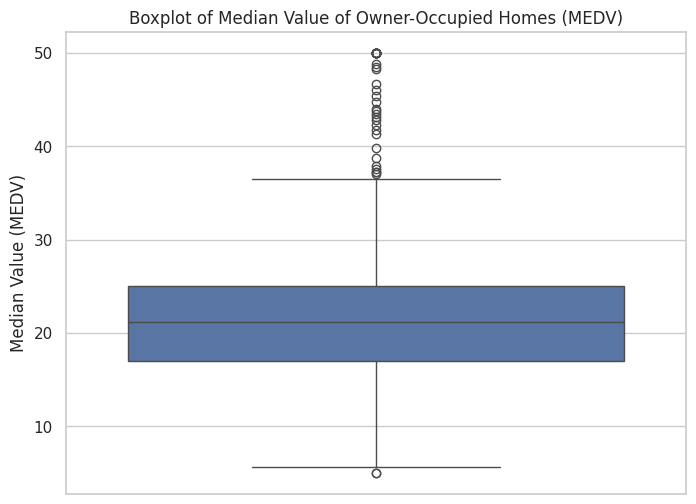

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value (MEDV)')
plt.show()

The boxplot shows that

##Bar Plot: CHAS

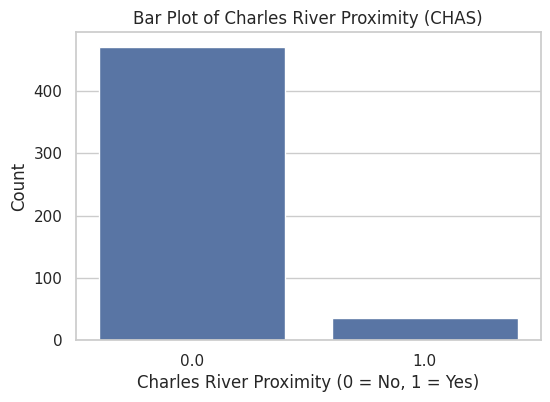

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Proximity (CHAS)')
plt.xlabel('Charles River Proximity (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

The bar plot shows that

##Boxplot: MEDV vs AGE Groups

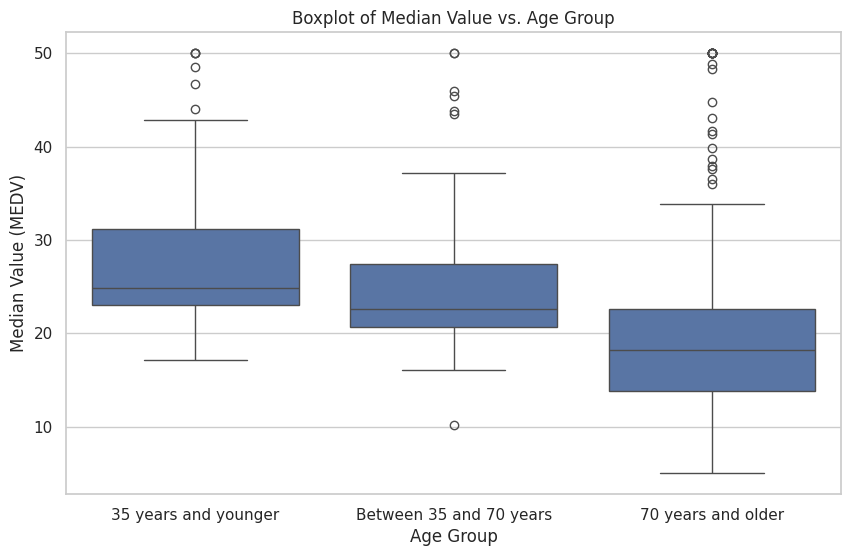

In [ ]:
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (MEDV)')
plt.show()

The boxplot shows that

##Scatter Plot: NOX vs INDUS

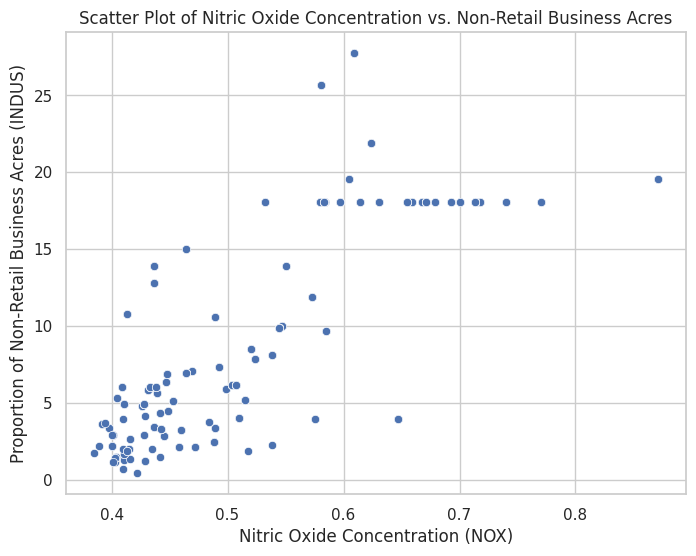

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentration vs. Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()

##Histogram: PIRATIO

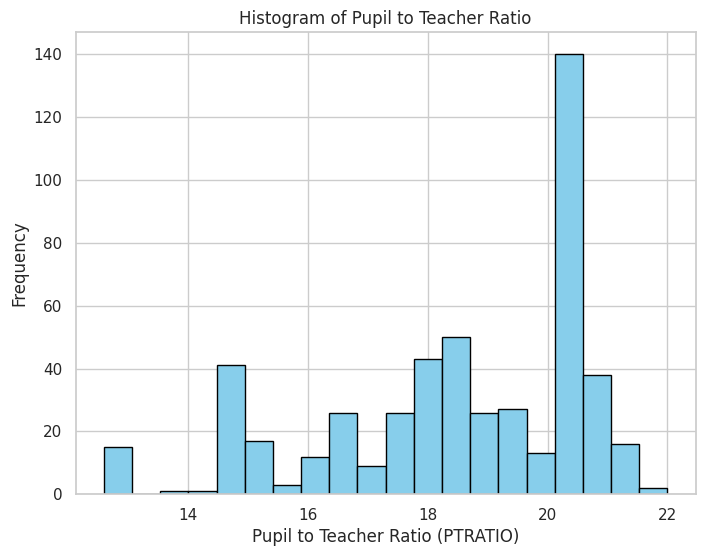

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

##t-Test: MEDV vs CHAS

In [ ]:
alpha = 0.05
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_statistic, p_value = stats.ttest_ind(chas_0, chas_1)

print(f"T-test: t-statistic = {t_statistic:.3f}, p-value = {p_value:.3f}")
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median house value between houses bounded by the Charles River and those that are not.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median house value between houses bounded by the Charles River and those that are not.")



T-test: t-statistic = -3.996, p-value = 0.000
Conclusion: Reject the null hypothesis. There is a significant difference in median house value between houses bounded by the Charles River and those that are not.


##ANOVA: MEDV vs AGE_Group

In [ ]:
model = ols('MEDV ~ AGE_Group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)

print("ANOVA Table:")
print(anova_table)

p_value = anova_table['PR(>F)']['AGE_Group']
print(f"P-value: {p_value:.3f}")
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median house value across at least one of the age groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median house value across the age groups.")



ANOVA Table:
              df        sum_sq      mean_sq         F        PR(>F)
AGE_Group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN
P-value: 0.000
Conclusion: Reject the null hypothesis. There is a significant difference in median house value across at least one of the age groups.


##Pearson Correlation: NOX vs INDUS

In [ ]:
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation: correlation coefficient = {correlation:.3f}, p-value = {p_value:.3f}")
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a statistically significant linear relationship between nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no statistically significant linear relationship between nitric oxide concentrations and proportion of non-retail business acres per town.")



Pearson Correlation: correlation coefficient = 0.764, p-value = 0.000
Conclusion: Reject the null hypothesis. There is a statistically significant linear relationship between nitric oxide concentrations and proportion of non-retail business acres per town.


##Regression Analysis: MEDV vs DIS

In [ ]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

dis_coefficient = model.params['DIS']
p_value = model.pvalues['DIS']

print(f"DIS Coefficient: {dis_coefficient:.3f}, p-value: {p_value:.3f}")
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a statistically significant impact of the weighted distance to the five Boston employment centres on the median value of owner occupied homes.")
    if dis_coefficient > 0:
        print("The impact is positive: as distance to employment centers increases, median home value increases.")
    else:
        print("The impact is negative: as distance to employment centers increases, median home value decreases.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no statistically significant impact of the weighted distance to the five Boston employment centres on the median value of owner occupied homes.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        13:18:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0